# Decision Boundary example

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

## Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

newX = iris.data[:, [2, 3]]
newY = iris.target
dtc = DecisionTreeClassifier().fit(newX, newY)


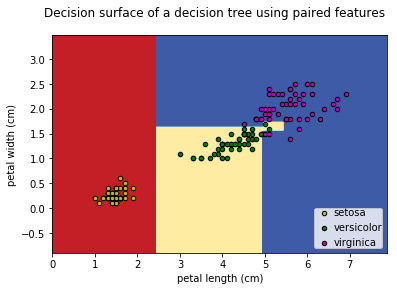

In [6]:
x_min, x_max = newX[:, 0].min() - 1, newX[:, 0].max() + 1
y_min, y_max = newX[:, 1].min() - 1, newX[:, 1].max() + 1

import numpy as np

import matplotlib.pyplot as plt


plot_step = 0.02
n_classes = 3
plot_colors = "ygm"

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(newY == i)
    plt.scatter(newX[idx, 0], newX[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## Logistic Regression

In [7]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target


In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

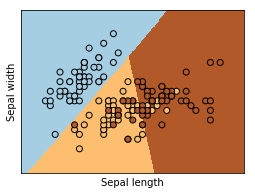

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y1_min, y1_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh

xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))
Z1 = logreg.predict(np.c_[xx1.ravel(), yy1.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx1.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx1, yy1, Z1, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx1.min(), xx1.max())
plt.ylim(yy1.min(), yy1.max())
plt.xticks(())
plt.yticks(())

plt.show()